In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
for col in df:
  print(df[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [19]:
df_copy = df.copy()
df_copy['Ort_Not'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df_copy.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Ort_Not
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


1. Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [20]:
df_copy.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Ort_Not                        0
dtype: int64

In [21]:
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

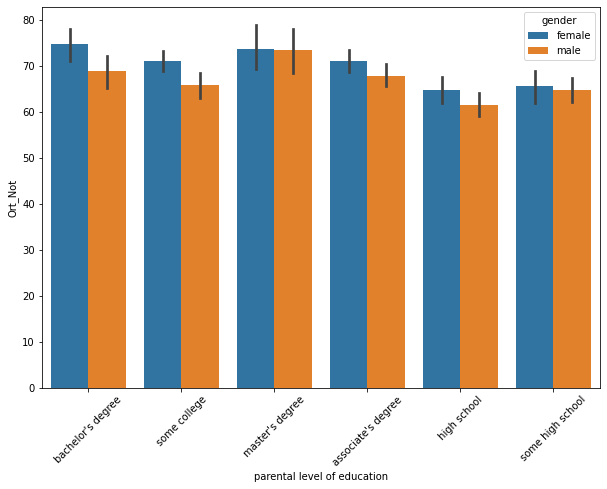

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x = "parental level of education", y = "Ort_Not", hue = "gender", data = df_copy)
plt.xticks(rotation=45)
plt.show()

Kolonlardan da görüldüğü üzere, velilerin eğitim derecesinin ve cinsiyetinin ortalama not üzerinde hiçbir etkisi yok.

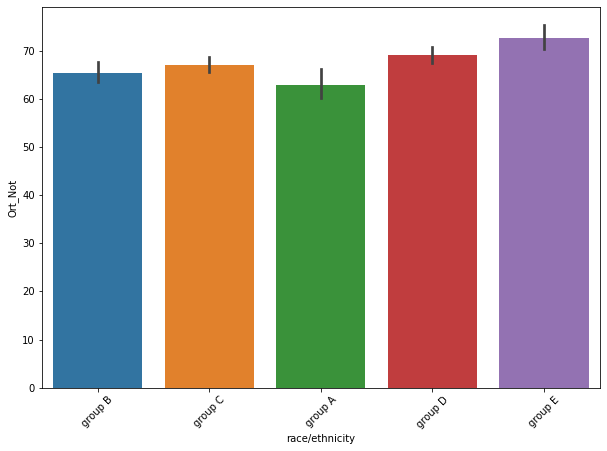

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x = "race/ethnicity", y = "Ort_Not", data = df_copy)
plt.xticks(rotation=45)
plt.show()

Yine açıkça görülüyor ki, etnik farklılıkların da ortalama not üzerinde gözle görülür bir etkisi yok.

2. Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

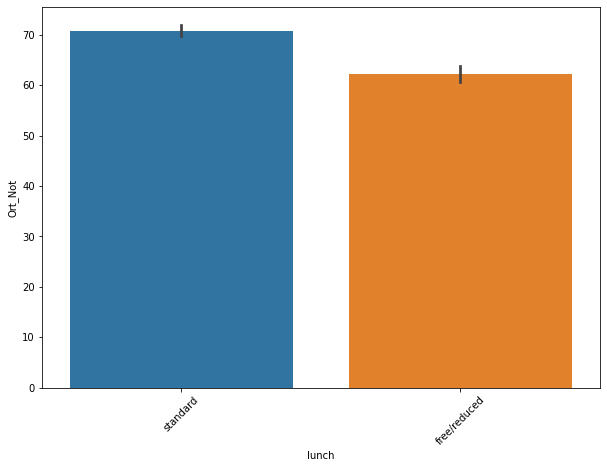

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x = "lunch", y = "Ort_Not", data = df_copy)
plt.xticks(rotation=45)
plt.show()

Standart yemek tipinin notlarının, azaltılmış yemek tipi notlarına oranla daha yüksek olduğunu gözlemledim. Beslenme, zihin ve beden diriliğini ve gelişimini sağladığı için, notlarla bağlantı kurulabilir.

3. Hazırlık kurslarının sınav performansı üzerinde bir etkisi var mı?

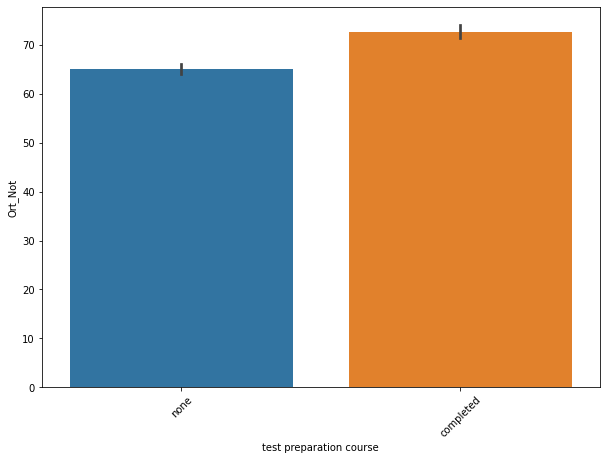

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(x = "test preparation course", y = "Ort_Not", data = df_copy)
plt.xticks(rotation=45)
plt.show()

Evet, görüldüğü üzere hazırlık kursunu tamamlayan öğrencilerin ortalama notları, tamamlamayan öğrencilere kıyasla daha yüksek.

4. Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [30]:
df_copy.corr()

,math score,reading score,writing score,Ort_Not
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
Ort_Not,0.918746,0.970331,0.965667,1.000000


Birbirizle korelasyonu en fazla olan iki ders, 0.95 korelasyon ile okuma notu ve yazma notu.